In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

2022-08-16 17:49:00.866357: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-16 17:49:00.866385: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df1 = df[['radius_mean','texture_mean','perimeter_mean','area_mean', 'smoothness_mean','compactness_mean', 'concavity_mean', 'diagnosis']]
df1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,M


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df1.drop(['diagnosis'], axis='columns'))
df2 = pd.DataFrame(df_norm, columns=['radius_mean','texture_mean','perimeter_mean','area_mean', 'smoothness_mean','compactness_mean', 'concavity_mean'])
df2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918


In [6]:
df2['diagnosis'] = df1.diagnosis

In [7]:
le = LabelEncoder()
df2.diagnosis = le.fit_transform(df2.diagnosis)
df2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,diagnosis
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,1
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,1
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,1
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,1
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,1


<AxesSubplot:>

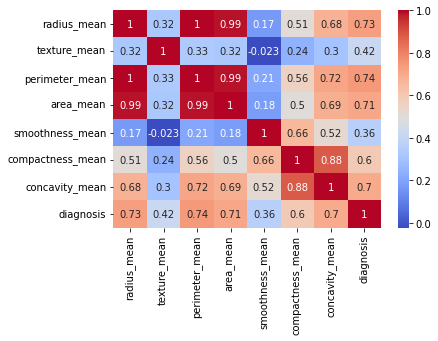

In [8]:
sns.heatmap(df2.corr(),annot=True, cmap='coolwarm' )

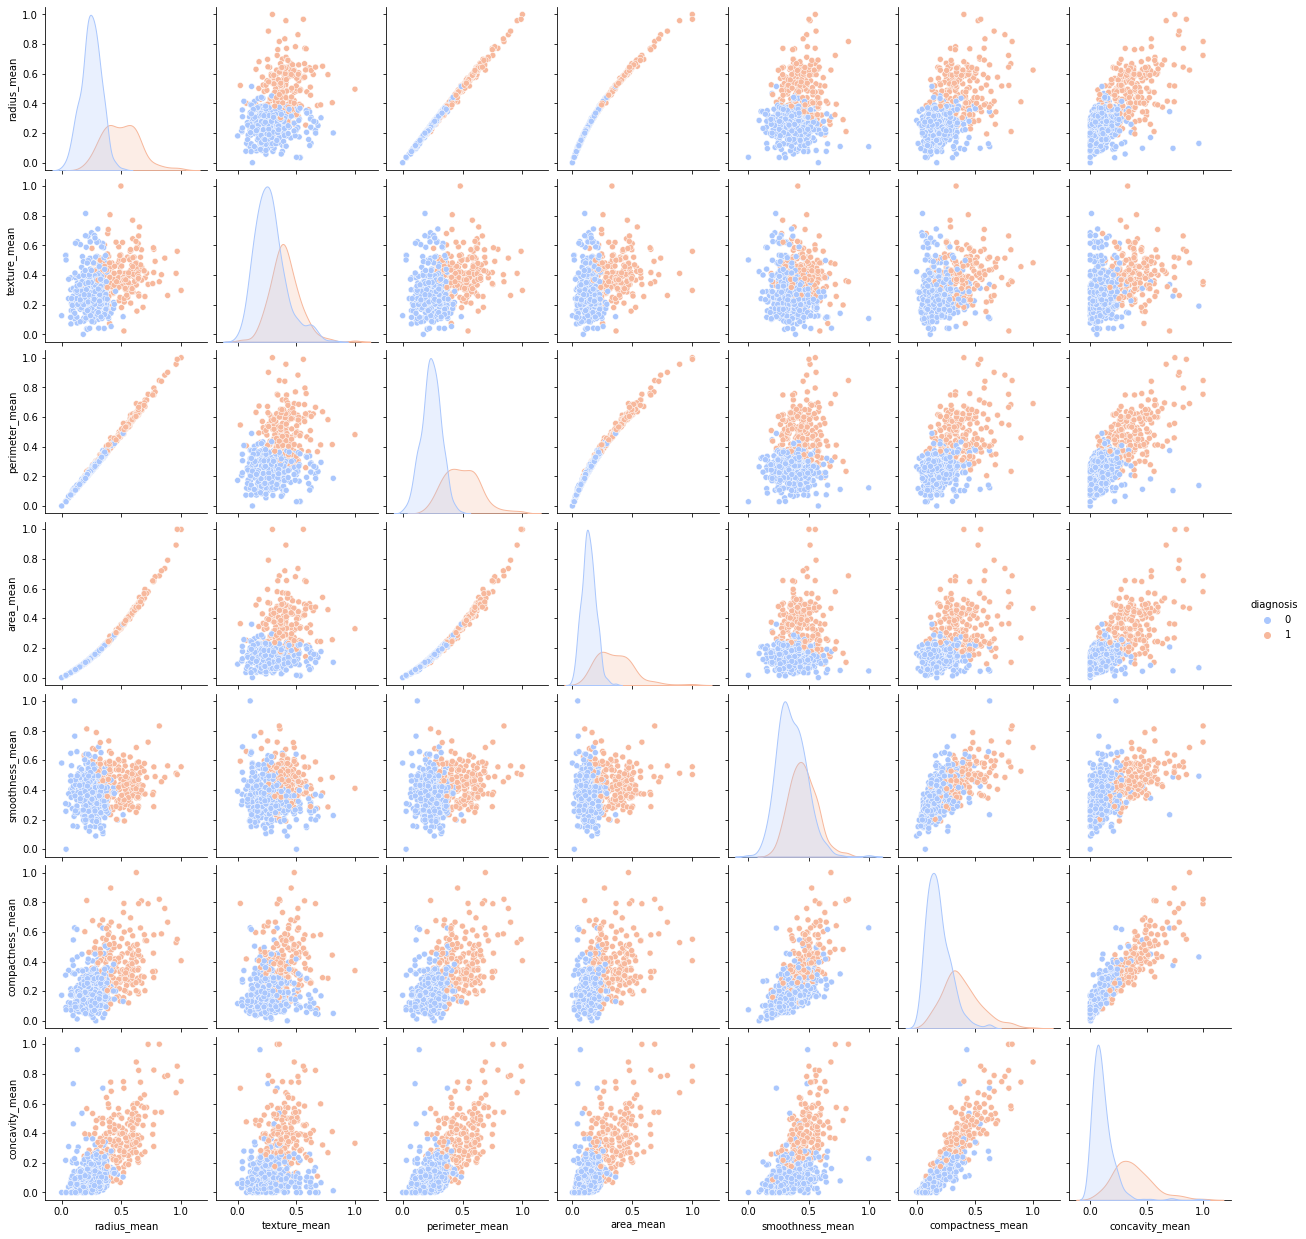

In [9]:
sns.pairplot(df2, palette='coolwarm', hue='diagnosis')

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df2.drop(['diagnosis'], axis='columns'), df2.diagnosis, test_size=0.20)

In [11]:
model = Sequential([
    tf.keras.Input(shape=(7,)),
    Dense(25, activation='relu', name='layer1'),
    Dense(15, activation='relu', name='layer2'),
    Dense(1, activation='sigmoid', name='layer3')
])

2022-08-16 17:49:14.374783: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-16 17:49:14.375459: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-16 17:49:14.375823: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-08-16 17:49:14.376051: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-08-16 17:49:14.376232: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                200       
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 1)                 16        
                                                                 
Total params: 606
Trainable params: 606
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    x_train,y_train,
    epochs=100
)

Epoch 1/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6831
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6733
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6607
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6471
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6338
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6190
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6013
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5800
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5549
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5259
Epoch 11/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4958
Epoch 12/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4640
Epoch 13/100
15/15 [=================

In [14]:
model.predict([[0.159709,0.120122,0.985578,0.510498,0.517017,0.626403,0.143674]])[0][0]

1/1 [==============================] - 0s 95ms/step


0.9589821

In [15]:
def predict(x):
    p = model.predict(x)
    for i in range(len(p)):
        if p[i] >= 0.5:
            p[i] = 1
        else:
            p[i] = 0
    return p

4/4 [==============================] - 0s 2ms/step


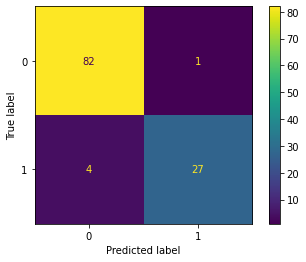

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
y_hat = predict(x_test)
cm = confusion_matrix(y_test, y_hat)
ConfusionMatrixDisplay(cm).plot()

In [17]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        83
           1       0.96      0.87      0.92        31

    accuracy                           0.96       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.96      0.96      0.96       114

